# ANN Implementation

# Part 1 - Data Preprocessing

In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

# Printing first 5 rows of dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Part of Data preprocessing, we need to handle missing values.
# Checking is there any Null Values
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
# We need to split the dataset into "Dependent" and "Independent" features. i.e, X and Y. 
# We dont need RowNumber, CustomerId and Surname.

x = dataset.iloc[:,3:13] # Need all row and column from column 3 to 12
y = dataset.iloc[:,13]

In [5]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
# From the above x dataset, Geography and Gender are having catageroical data. 
# We can see how, we can conver categorical data into numerical data i.e, integer data

# Creating dummy variables
geography = pd.get_dummies(x['Geography'], drop_first=True) # Unique features are converted to one hot encoding concept. 
gender = pd.get_dummies(x['Gender'], drop_first=True)

# If the value is present, it is donated as 1 else 0 --- Concept of One Hot encoding

In [8]:
geography
# France is not displayed because if Germany and Spain is 0, then basically France is present i.e 1.
# we mentioned drop_first = True. so France is not displayed

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
# We need to add the geography and gender feature to my dataset

# Concatenating the dataframes
x = pd.concat([x,geography,gender], axis=1) # axis=1 i.e concatenate along the column

# Dropping the Geography and Gender from the dataset
x = x.drop(['Geography', 'Gender'], axis=1)

In [11]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
x.shape

(10000, 11)

In [13]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [14]:
# Feature Scaling - Helps to reduce Gradient Descent curve.

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train) # We use fit_transform to overcome, overfitting problem.
                                    # When ever the values going to change, that time we need to fit_transform
x_test = sc.transform(x_test)

In [15]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

# Part 2 - ANN Implementation

In [16]:
import tensorflow
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

print(tensorflow.__version__)

2.2.0


In [17]:
# ANN Architecture

model = Sequential() # sequential() help us to do forward and backward propogation

# Adding the input layer and the first hidden layer
model.add(Dense(units = 10,kernel_initializer='he_uniform',activation='relu',input_dim = 11)) 
# whenever we using activation function as 'relu', in that case we are going to use kernel_initializer = 'he_uniform'

# Adding the second hidden layer
model.add(Dense(units = 10, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
# Sigmoid function help us to get the binary output. ie. 0 or 1. so we specify units=1. Because, it is a binary classification
# problem.

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 241
Trainable params: 241
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Fitting the ANN to the Training set
model_history=model.fit(x_train, y_train, validation_split=0.33, batch_size = 100, epochs = 100)

Epoch 1/100
54/54 [==============================] - 1s 12ms/step - loss: 0.8078 - accuracy: 0.4701 - val_loss: 0.6632 - val_accuracy: 0.6153
Epoch 2/100
54/54 [==============================] - 0s 3ms/step - loss: 0.6037 - accuracy: 0.6893 - val_loss: 0.5579 - val_accuracy: 0.7497
Epoch 3/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5395 - accuracy: 0.7751 - val_loss: 0.5223 - val_accuracy: 0.7846
Epoch 4/100
54/54 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.7921 - val_loss: 0.5023 - val_accuracy: 0.7895
Epoch 5/100
54/54 [==============================] - 0s 4ms/step - loss: 0.4927 - accuracy: 0.7964 - val_loss: 0.4876 - val_accuracy: 0.7952
Epoch 6/100
54/54 [==============================] - 0s 5ms/step - loss: 0.4778 - accuracy: 0.7977 - val_loss: 0.4762 - val_accuracy: 0.8005
Epoch 7/100
54/54 [==============================] - 0s 8ms/step - loss: 0.4659 - accuracy: 0.8005 - val_loss: 0.4673 - val_accuracy: 0.8035
Epoch 8/100


Epoch 59/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.8640 - val_loss: 0.3571 - val_accuracy: 0.8565
Epoch 60/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8655 - val_loss: 0.3570 - val_accuracy: 0.8554
Epoch 61/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3254 - accuracy: 0.8625 - val_loss: 0.3570 - val_accuracy: 0.8554
Epoch 62/100
54/54 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.8640 - val_loss: 0.3569 - val_accuracy: 0.8576
Epoch 63/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8640 - val_loss: 0.3566 - val_accuracy: 0.8580
Epoch 64/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3247 - accuracy: 0.8638 - val_loss: 0.3565 - val_accuracy: 0.8561
Epoch 65/100
54/54 [==============================] - 0s 3ms/step - loss: 0.3245 - accuracy: 0.8658 - val_loss: 0.3566 - val_accuracy: 0.8569
Epoch 

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

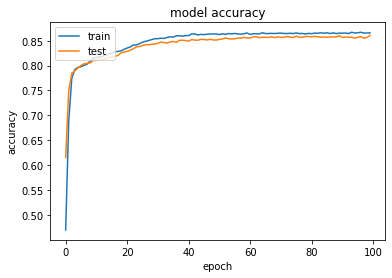

In [21]:
# list all data in history

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

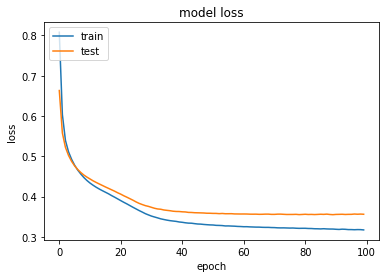

In [23]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making Predicton from our Trained model

In [27]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [29]:
# Checking Accuracy 

from sklearn.metrics import accuracy_score

accuracy_score(y_pred,y_test)

0.8585